# Customer Churn Prediction
#### Predicting Telco Customer Churn Using Several Algorithm (KNN, Random Forest, SVC, Naive Bayes dan MLP)

### 1. Import Data
Data Used is Telco Customer Churn Data from Kaggle

In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('telco-customer-churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### 2. Data Preparation
Replacing space with NA and drop it, change "TotalCharges" data type to float, replacing 'No internet service' to No for the some columns, encoding and making dummies data for several variables.

In [3]:
data['TotalCharges']=data['TotalCharges'].replace(" ", np.nan)
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [4]:
data=data.dropna()

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
data["TotalCharges"] = data["TotalCharges"].astype(float)

c:\users\acer\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
data=data.drop('customerID', axis=1)

In [9]:
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for j in replace_cols : 
    data[j]  = data[j].replace({'No internet service' : 'No'})

In [10]:
data_bfr_dummies=data

In [11]:
column=list(data.columns)

for i in column:
    if data[i].dtypes=='object':
        print(data[i].unique())

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['No' 'Yes']


In [12]:
binary_columns=list(data.nunique()[(data.nunique() == 2) & (data.columns != 'Churn')].keys())
multi_columns=list(data.nunique()[(data.nunique()>2) & (data.nunique()<=5)].keys())

In [13]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for i in binary_columns:
    data[i]=le.fit_transform(data[i])

data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,No
1,1,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,No
2,1,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,1,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,0,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes
5,0,0,0,0,8,1,Yes,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,Yes
6,1,0,0,1,22,1,Yes,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,No
7,0,0,0,0,10,0,No phone service,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,No
8,0,0,1,0,28,1,Yes,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,Yes
9,1,0,0,1,62,1,No,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,No


In [14]:
data = pd.get_dummies(
    data, columns = multi_columns,
    drop_first = True
)
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,0,0,...,No,1,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,1,0,...,No,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,1,0,0,...,Yes,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,1,1,...,No,1,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,Yes,0,0,1,0,0,0,0,1,0
5,0,0,0,0,8,1,0,0,1,0,...,Yes,0,1,1,0,0,0,0,1,0
6,1,0,0,1,22,1,0,1,0,0,...,No,0,1,1,0,0,0,1,0,0
7,0,0,0,0,10,0,1,0,0,0,...,No,1,0,0,0,0,0,0,0,1
8,0,0,1,0,28,1,0,0,1,1,...,Yes,0,1,1,0,0,0,0,1,0
9,1,0,0,1,62,1,1,1,0,0,...,No,0,0,0,0,1,0,0,0,0


In [15]:
data.columns.tolist()

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

In [16]:
x=data.drop('Churn',axis=1)
y=data['Churn']

In [17]:
x.isnull().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMeth

### 3. EDA

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
value=data['Churn'].value_counts().values.tolist()
label=data['Churn'].value_counts().keys().tolist()

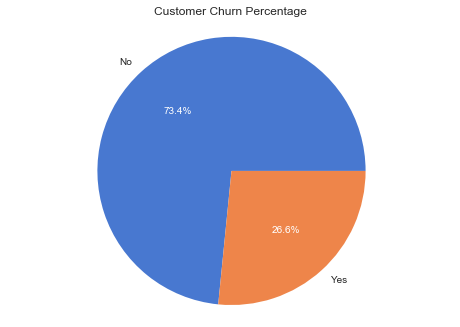

In [20]:
plt.style.use('seaborn')
color = sns.color_palette('muted')
_, _, autotexts = plt.pie(value,labels=label,autopct='%1.1f%%',colors=color)
for autotext in autotexts:
    autotext.set_color('white')
plt.title('Customer Churn Percentage')
plt.axis('equal')
plt.show()

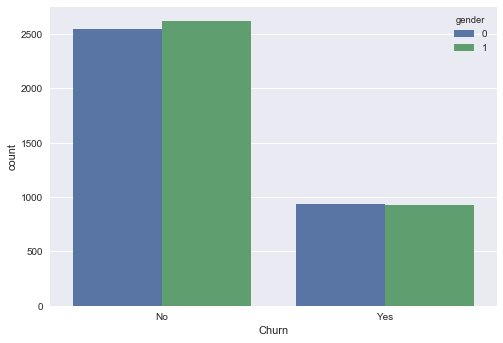

In [21]:
sns.countplot(x='Churn',hue='gender', data=data)
plt.show()

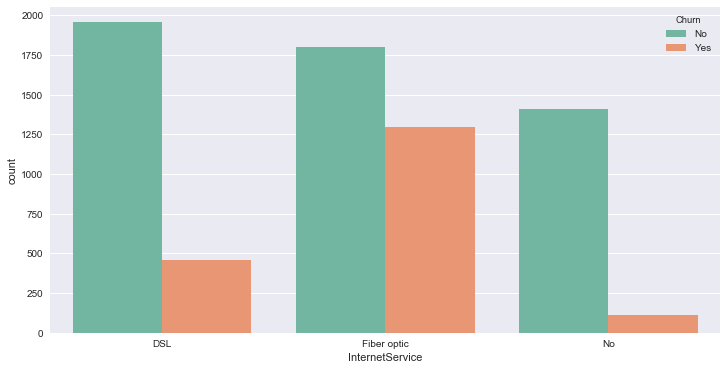

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(x='InternetService',data=data_bfr_dummies, hue='Churn', palette='Set2')

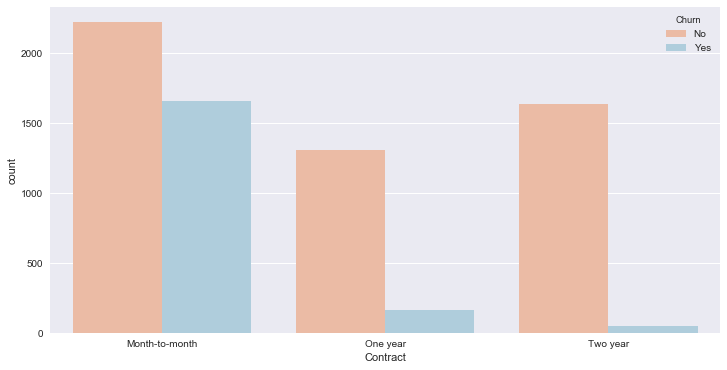

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(x='Contract',data=data_bfr_dummies, hue='Churn', palette='RdBu')

### 4. Modelling

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test=train_test_split(x,y, test_size=0.1)

Because the data is imbalanced, i decided to apply SMOTE to make the Churn data balance.

In [42]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))

[('No', 4656), ('Yes', 4656)]


In [44]:
def nilai_k():
    k= round(len(X_train)**.5)
    if (k%2 == 0):
        return k+1
    else:
        return k

In [45]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier

In [46]:
from sklearn.model_selection import GridSearchCV
def GridSearch(x, y, model, parameters):
    clf = GridSearchCV(model, parameters, scoring='accuracy', n_jobs=-1, cv=10, verbose=1)
    clf.fit(x, y)
    print(model)
    print("Best Score: "+str(clf.best_score_))
    print("Best Params: "+str(clf.best_params_))
    return (clf)

In [47]:
# Hyperparameter Neural Nets
ListParams = {
    'hidden_layer_sizes': [(5,),(6,),(7,),(8,),(9,),(10,),(11,),(12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,),(30,)]
}

BestNN = GridSearch(X_train_res, y_train_res, MLPClassifier(random_state=0,max_iter=5000,batch_size=1, solver='adam', activation='logistic'), ListParams)

Fitting 10 folds for each of 17 candidates, totalling 170 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed: 80.9min finished


MLPClassifier(activation='logistic', alpha=0.0001, batch_size=1, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
Best Score: 0.7168170103092784
Best Params: {'hidden_layer_sizes': (19,)}


In [73]:
model_knn= KNeighborsClassifier(n_neighbors=nilai_k())
model_rf=RandomForestClassifier(n_estimators=1000)
model_svc=SVC(gamma='auto',probability=True)
model_nb = BernoulliNB()
model_mlp = MLPClassifier(hidden_layer_sizes=(19,),activation='logistic',random_state=0,max_iter=5000,verbose=False,batch_size=1,solver='adam')

In [74]:
model_knn.fit(X_train_res,y_train_res)
model_rf.fit(X_train_res,y_train_res)
model_svc.fit(X_train_res,y_train_res)
model_nb.fit(X_train_res, y_train_res)
model_mlp.fit(X_train_res, y_train_res)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=1, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(19,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=5000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [59]:
from sklearn.metrics import classification_report

In [75]:
print('Classification Result Using KNN\n')
print(classification_report(y_test,y_pred_knn))
print('-----------------------------------------------------\n')

print('Classification Result Using Random Forest\n')
print(classification_report(y_test,y_pred_rf))
print('-----------------------------------------------------\n')

print('Classification Result Using SVC\n')
print(classification_report(y_test,y_pred_svc))
print('-----------------------------------------------------\n')

print('Classification Result Using Naive Bayes\n')
print(classification_report(y_test,y_pred_nb))
print('-----------------------------------------------------\n')

print('Classification Result Using MLP\n')
print(classification_report(y_test,y_pred_mlp))
print('-----------------------------------------------------\n')

Classification Result Using KNN

              precision    recall  f1-score   support

          No       0.86      0.74      0.79       507
         Yes       0.50      0.68      0.58       197

    accuracy                           0.72       704
   macro avg       0.68      0.71      0.68       704
weighted avg       0.76      0.72      0.73       704

-----------------------------------------------------

Classification Result Using Random Forest

              precision    recall  f1-score   support

          No       0.83      0.90      0.86       507
         Yes       0.66      0.52      0.59       197

    accuracy                           0.79       704
   macro avg       0.75      0.71      0.72       704
weighted avg       0.78      0.79      0.78       704

-----------------------------------------------------

Classification Result Using SVC

              precision    recall  f1-score   support

          No       0.81      0.86      0.83       507
         Yes      